In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/bangladesh_divisions_dataset.csv")


In [3]:
df.head()

,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season,Satellite_Observation_Date,Remarks
0,Sylhet,Loamy,62,Agricultural,72,28.6,Wheat,Monsoon,2024-09-24,Requires attention
1,Dhaka,Sandy,63,Unused,118,23.8,Maize,Autumn,2024-01-31,Moderate potential
2,Rangpur,Peaty,51,Agricultural,106,32.0,Maize,Autumn,2024-03-11,Requires attention
3,Khulna,Sandy,67,Barren,336,31.6,Wheat,Autumn,2024-09-29,Low potential
4,Rangpur,Peaty,63,Agricultural,237,20.1,Rice,Winter,2024-04-01,Moderate potential


In [4]:
df.isnull().sum()

,0
Location,0
Soil_Type,0
Fertility_Index,0
Land_Use_Type,0
Average_Rainfall(mm),0
Temperature(°C),0
Crop_Suitability,0
Season,0
Satellite_Observation_Date,0
Remarks,0


In [5]:
df.describe()

,Fertility_Index,Average_Rainfall(mm),Temperature(°C)
count,2000.00000,2000.000000,2000.000000
mean,70.10450,223.136000,27.330250
std,17.97699,100.548543,4.341251
min,40.00000,50.000000,20.000000
25%,54.00000,137.000000,23.500000
50%,70.00000,222.500000,27.300000
75%,86.00000,308.000000,31.000000
max,100.00000,400.000000,35.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Location                    2000 non-null   object 
 1   Soil_Type                   2000 non-null   object 
 2   Fertility_Index             2000 non-null   int64  
 3   Land_Use_Type               2000 non-null   object 
 4   Average_Rainfall(mm)        2000 non-null   int64  
 5   Temperature(°C)             2000 non-null   float64
 6   Crop_Suitability            2000 non-null   object 
 7   Season                      2000 non-null   object 
 8   Satellite_Observation_Date  2000 non-null   object 
 9   Remarks                     2000 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 156.4+ KB


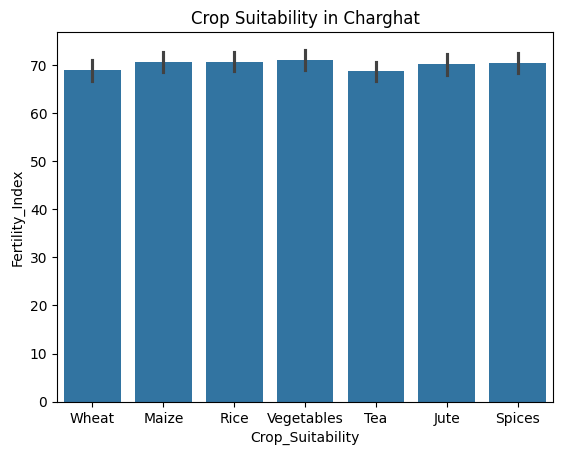

In [7]:
sns.barplot(x='Crop_Suitability', y='Fertility_Index', data=df)
plt.title('Crop Suitability in Charghat')
plt.show()

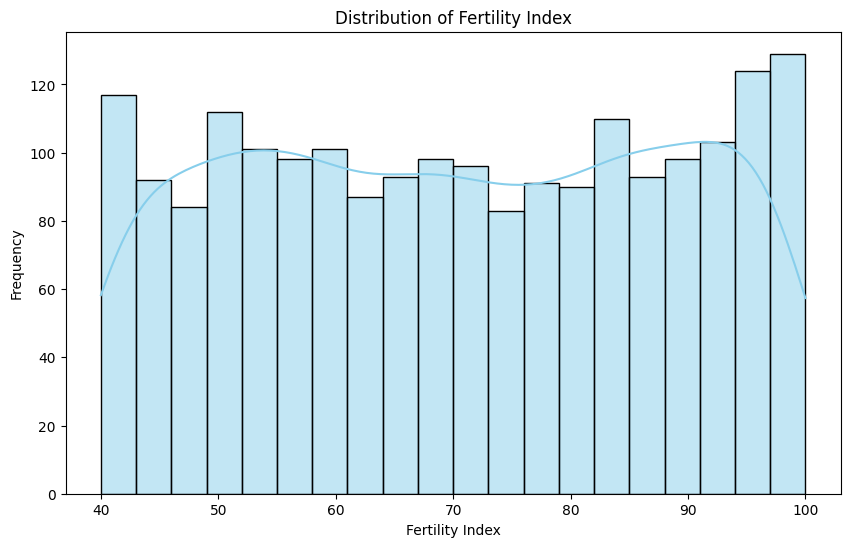

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Fertility_Index'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Fertility Index')
plt.xlabel('Fertility Index')
plt.ylabel('Frequency')
plt.show()

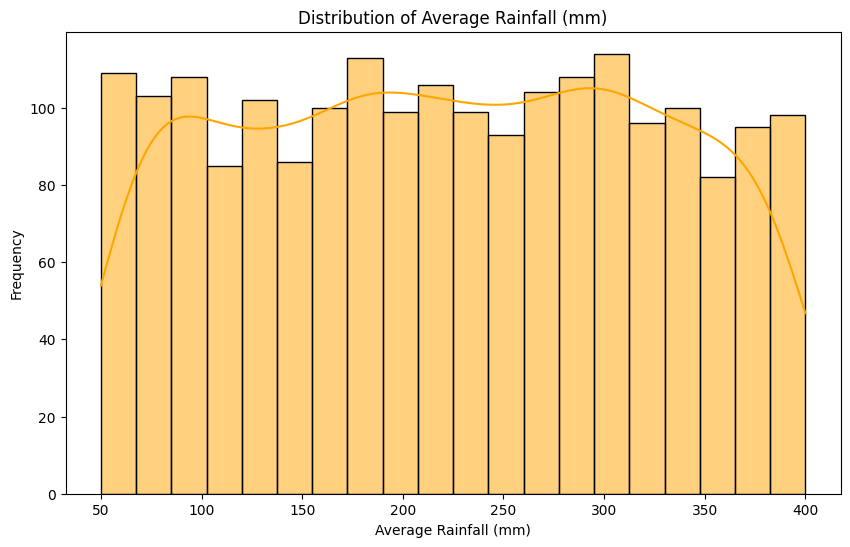

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Average_Rainfall(mm)'], kde=True, color='orange', bins=20)
plt.title('Distribution of Average Rainfall (mm)')
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Frequency')
plt.show()

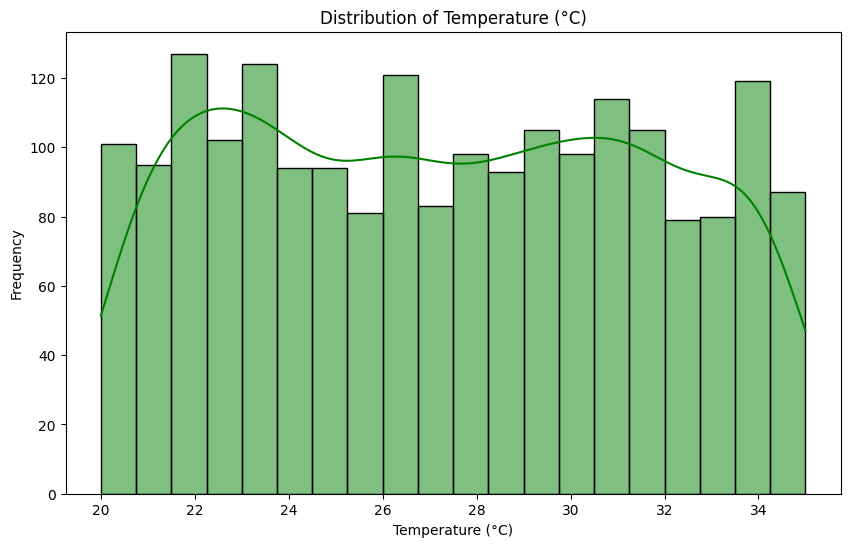

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Temperature(°C)'], kde=True, color='green', bins=20)
plt.title('Distribution of Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

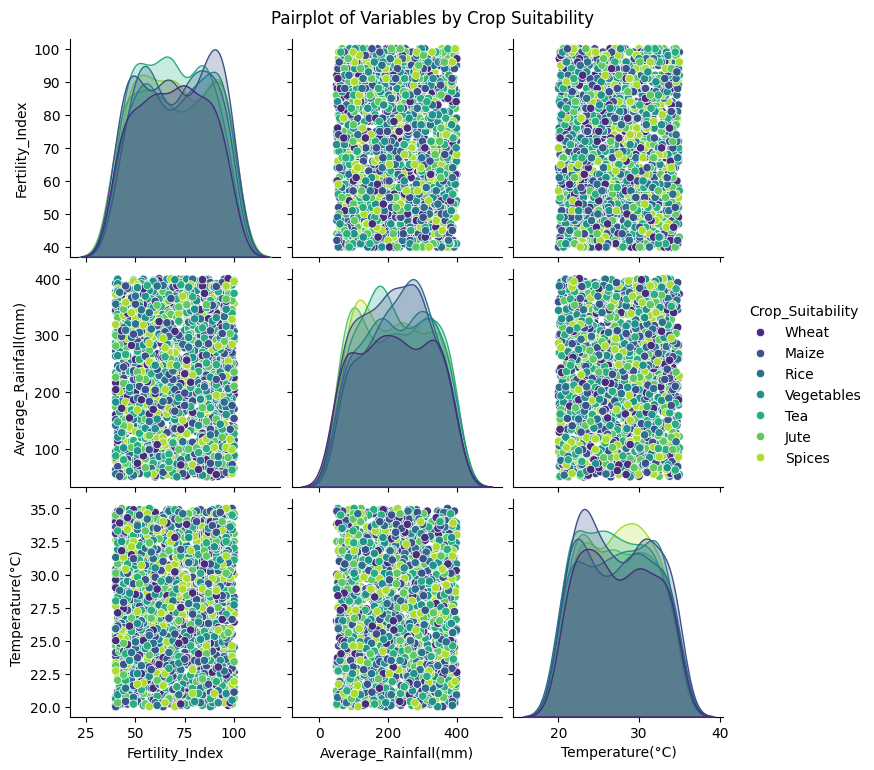

In [11]:
# Visualizing relationships between variables using pairplot
sns.pairplot(df, hue='Crop_Suitability', palette='viridis')
plt.suptitle('Pairplot of Variables by Crop Suitability', y=1.02)
plt.show()

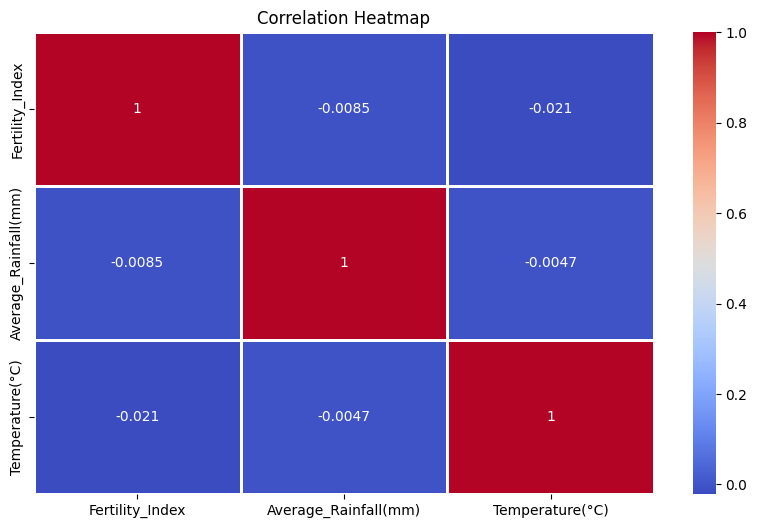

In [12]:
# Visualizing correlation heatmap between numerical variables
plt.figure(figsize=(10, 6))
correlation = df[['Fertility_Index', 'Average_Rainfall(mm)', 'Temperature(°C)']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

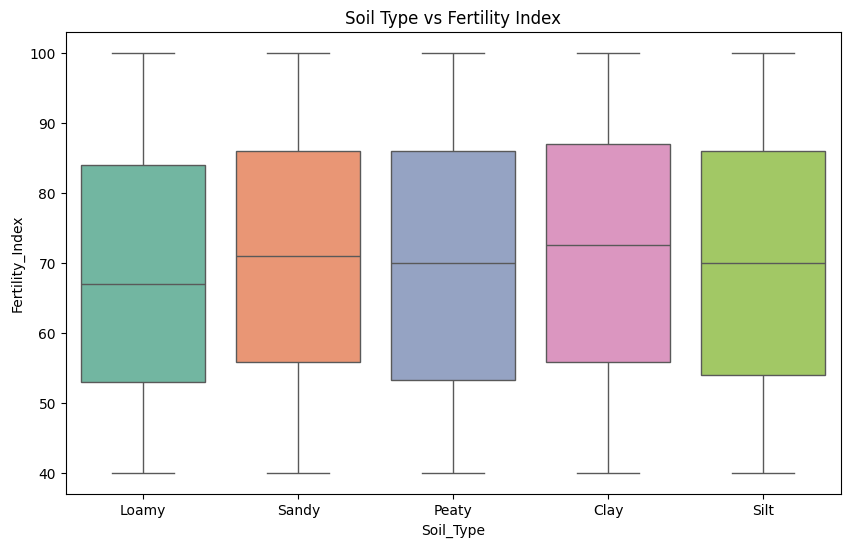

In [13]:
# Visualizing relationships between categorical variables and numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(x='Soil_Type', y='Fertility_Index', data=df, palette='Set2')
plt.title('Soil Type vs Fertility Index')
plt.show()


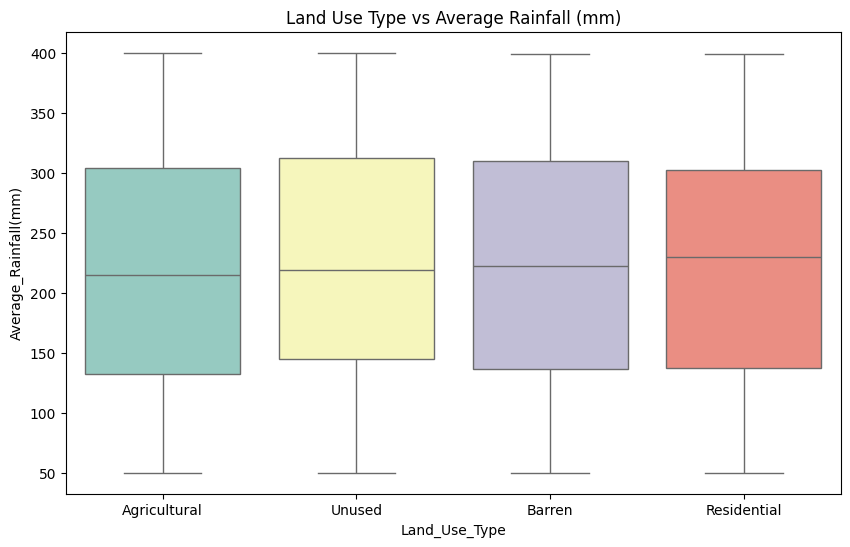

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Land_Use_Type', y='Average_Rainfall(mm)', data=df, palette='Set3')
plt.title('Land Use Type vs Average Rainfall (mm)')
plt.show()

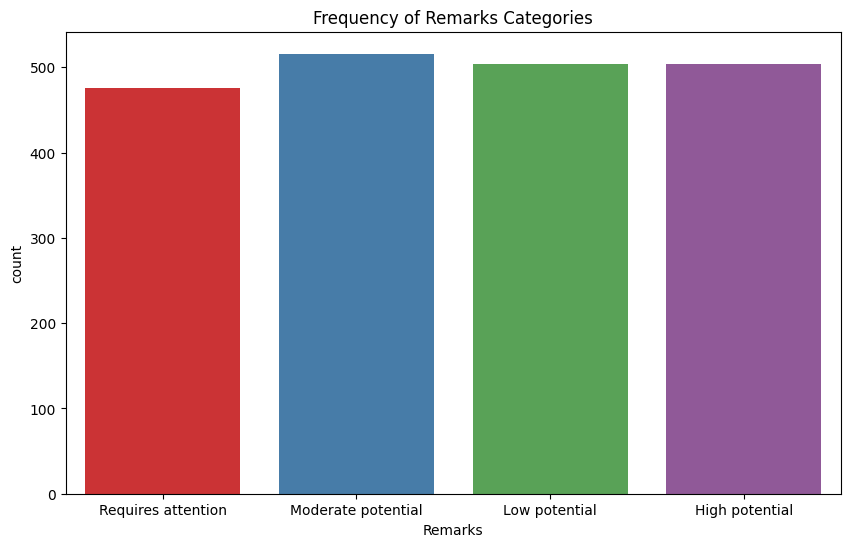

In [15]:
# Visualizing the frequency of 'Remarks' categories
plt.figure(figsize=(10, 6))
sns.countplot(x='Remarks', data=df, palette='Set1')
plt.title('Frequency of Remarks Categories')
plt.show()

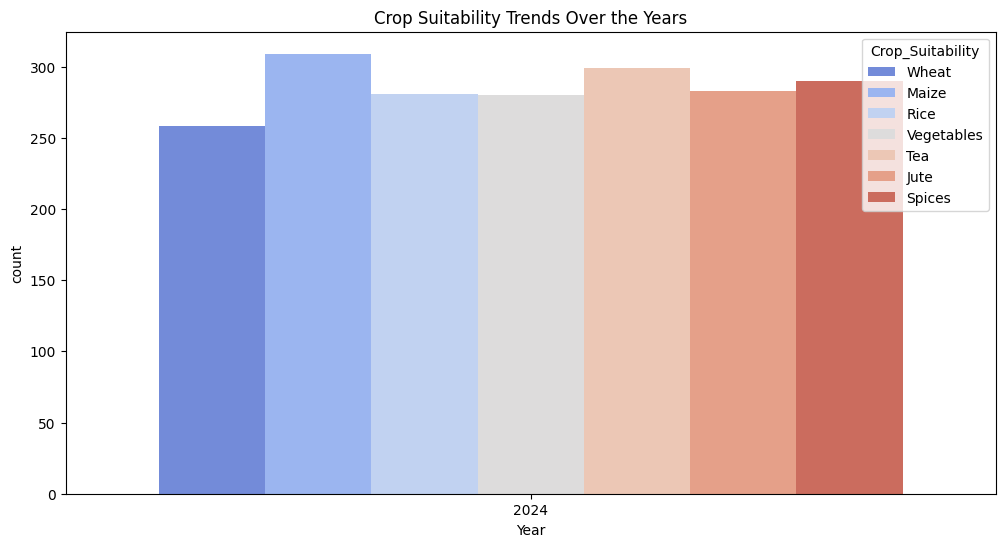

In [16]:
# Visualizing trends of 'Crop_Suitability' over time (based on Satellite Observation Date)
df['Satellite_Observation_Date'] = pd.to_datetime(df['Satellite_Observation_Date'])
df['Year'] = df['Satellite_Observation_Date'].dt.year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='Crop_Suitability', data=df, palette='coolwarm')
plt.title('Crop Suitability Trends Over the Years')
plt.show()

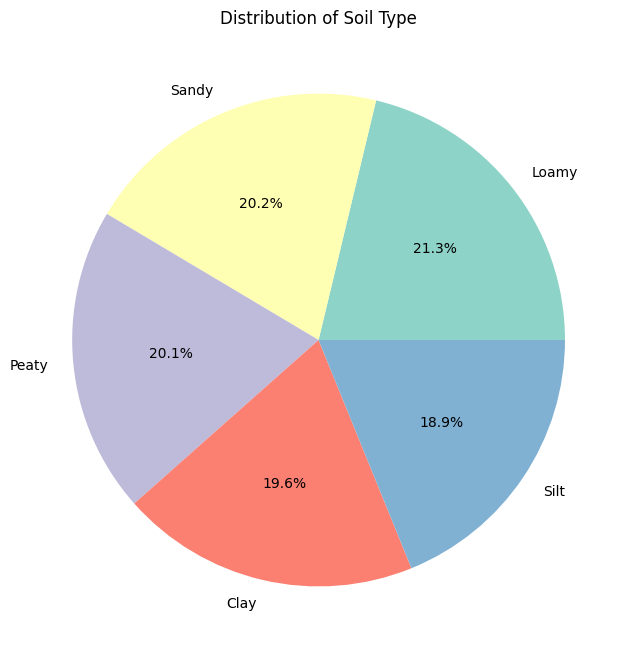

In [17]:
plt.figure(figsize=(8, 8))
soil_type_counts = df['Soil_Type'].value_counts()
plt.pie(soil_type_counts, labels=soil_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set3", len(soil_type_counts)))
plt.title('Distribution of Soil Type')
plt.show()

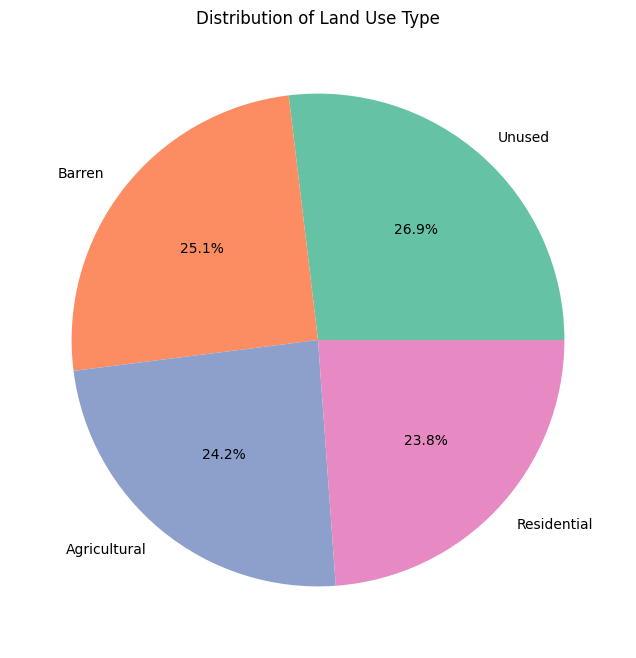

In [18]:
# Pie chart for distribution of 'Land_Use_Type'
plt.figure(figsize=(8, 8))
land_use_type_counts = df['Land_Use_Type'].value_counts()
plt.pie(land_use_type_counts, labels=land_use_type_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set2", len(land_use_type_counts)))
plt.title('Distribution of Land Use Type')
plt.show()

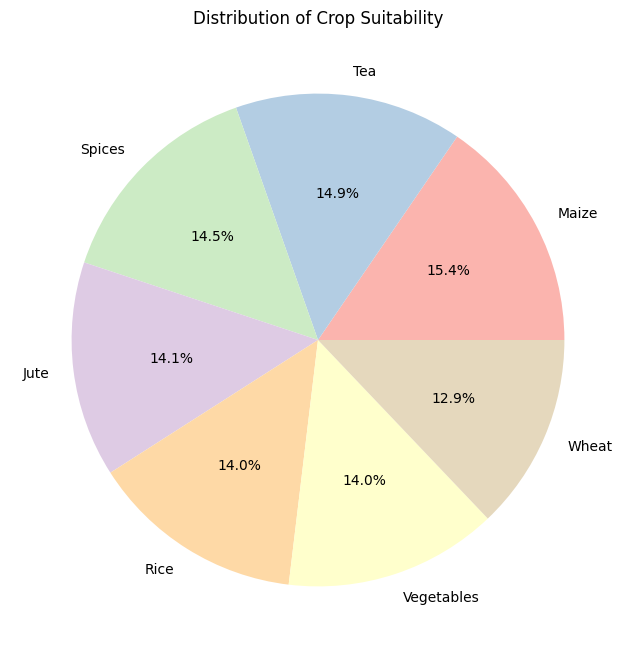

In [19]:
# Pie chart for distribution of 'Crop_Suitability'
plt.figure(figsize=(8, 8))
crop_suitability_counts = df['Crop_Suitability'].value_counts()
plt.pie(crop_suitability_counts, labels=crop_suitability_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Pastel1", len(crop_suitability_counts)))
plt.title('Distribution of Crop Suitability')
plt.show()

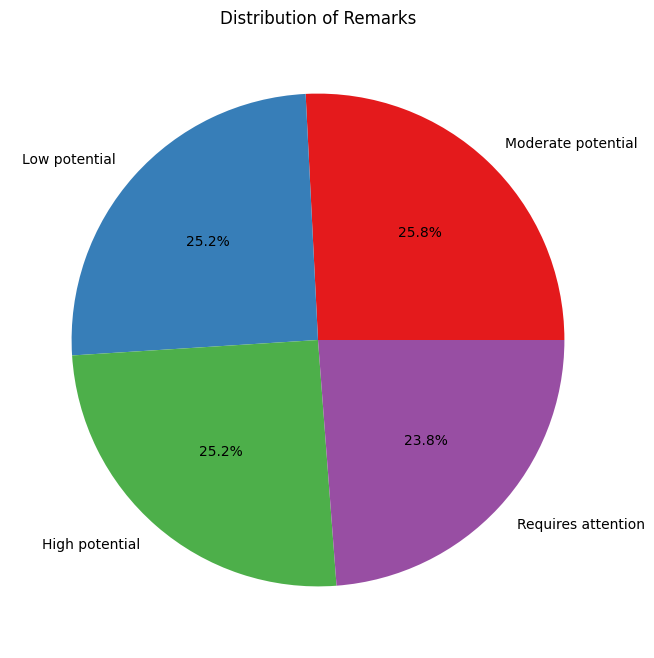

In [20]:
# Pie chart for distribution of 'Remarks'
plt.figure(figsize=(8, 8))
remarks_counts = df['Remarks'].value_counts()
plt.pie(remarks_counts, labels=remarks_counts.index, autopct='%1.1f%%', colors=sns.color_palette("Set1", len(remarks_counts)))
plt.title('Distribution of Remarks')
plt.show()

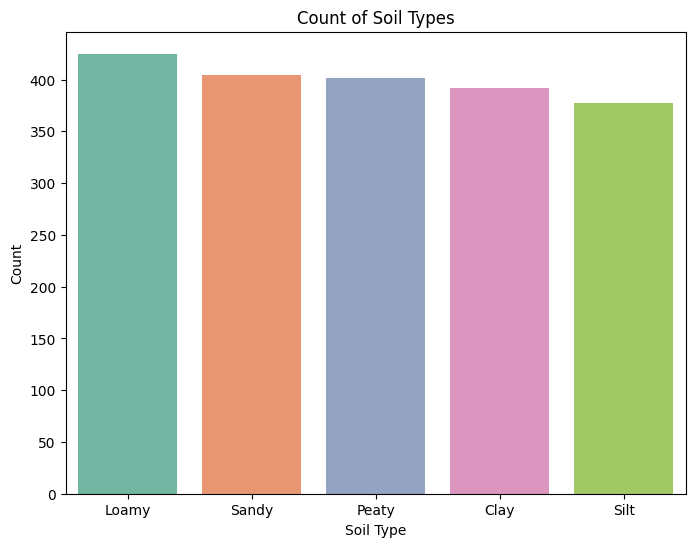

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Soil_Type', data=df, palette='Set2')
plt.title('Count of Soil Types')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.show()

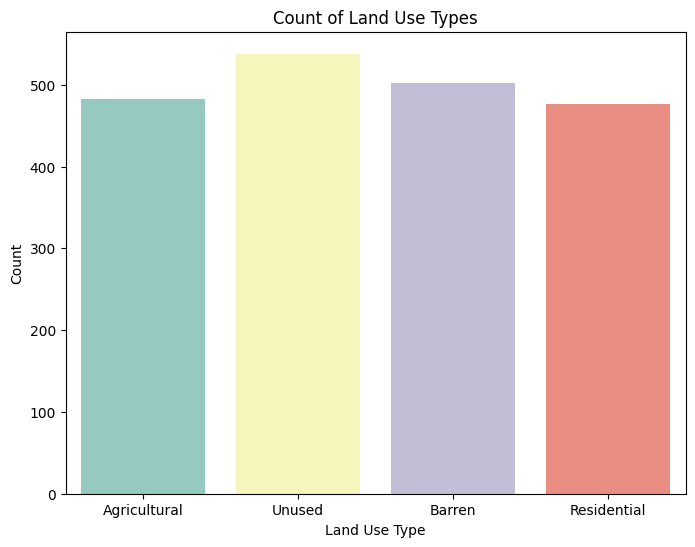

In [22]:
# Countplot for 'Land_Use_Type'
plt.figure(figsize=(8, 6))
sns.countplot(x='Land_Use_Type', data=df, palette='Set3')
plt.title('Count of Land Use Types')
plt.xlabel('Land Use Type')
plt.ylabel('Count')
plt.show()

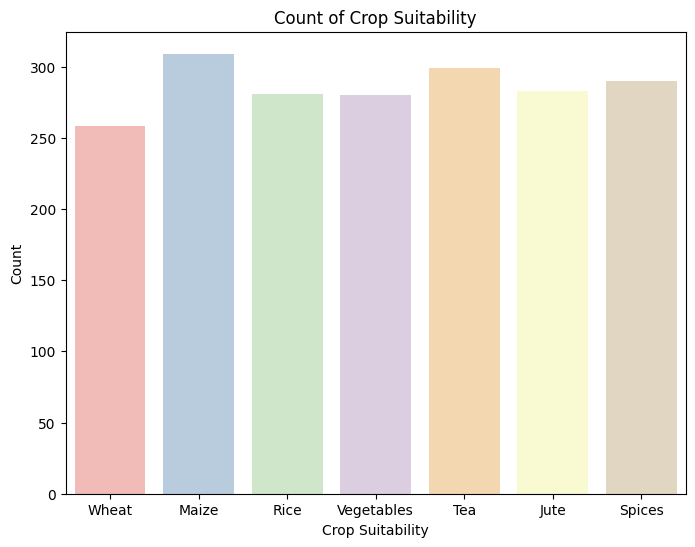

In [23]:
# Countplot for 'Crop_Suitability'
plt.figure(figsize=(8, 6))
sns.countplot(x='Crop_Suitability', data=df, palette='Pastel1')
plt.title('Count of Crop Suitability')
plt.xlabel('Crop Suitability')
plt.ylabel('Count')
plt.show()

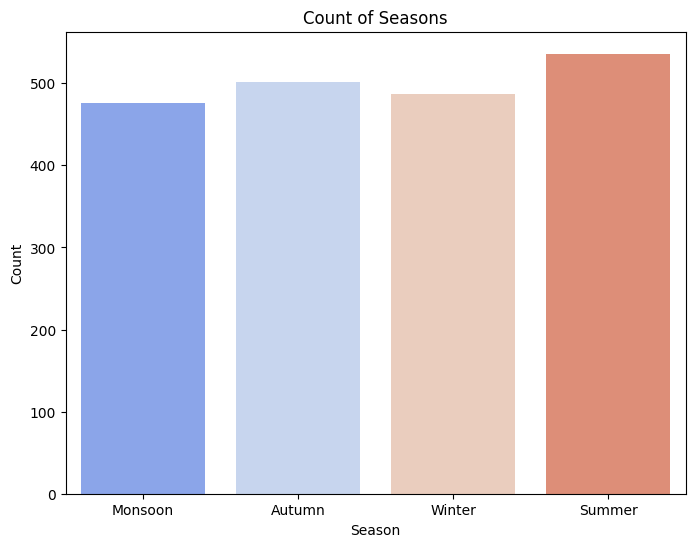

In [24]:
# Countplot for 'Season'
plt.figure(figsize=(8, 6))
sns.countplot(x='Season', data=df, palette='coolwarm')
plt.title('Count of Seasons')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

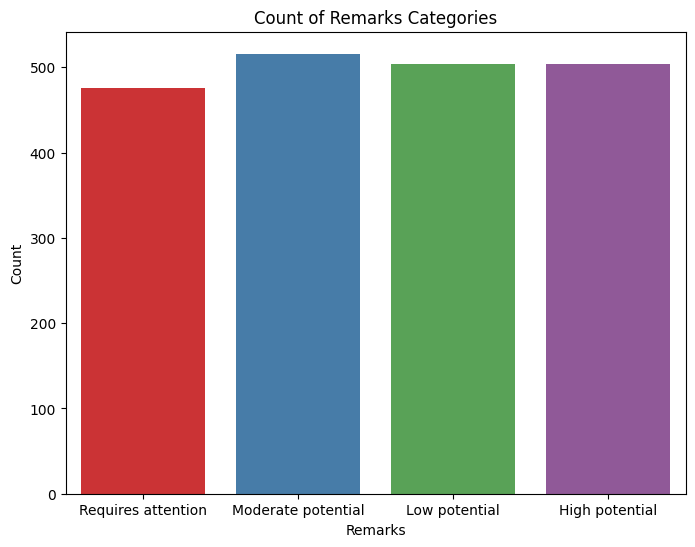

In [25]:
# Countplot for 'Remarks'
plt.figure(figsize=(8, 6))
sns.countplot(x='Remarks', data=df, palette='Set1')
plt.title('Count of Remarks Categories')
plt.xlabel('Remarks')
plt.ylabel('Count')
plt.show()

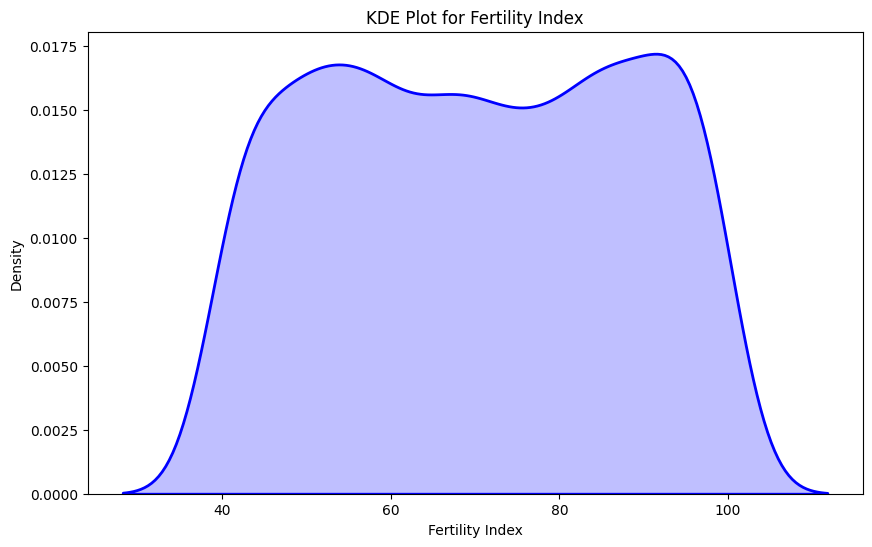

In [26]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fertility_Index'], shade=True, color='blue', linewidth=2)
plt.title('KDE Plot for Fertility Index')
plt.xlabel('Fertility Index')
plt.ylabel('Density')
plt.show()

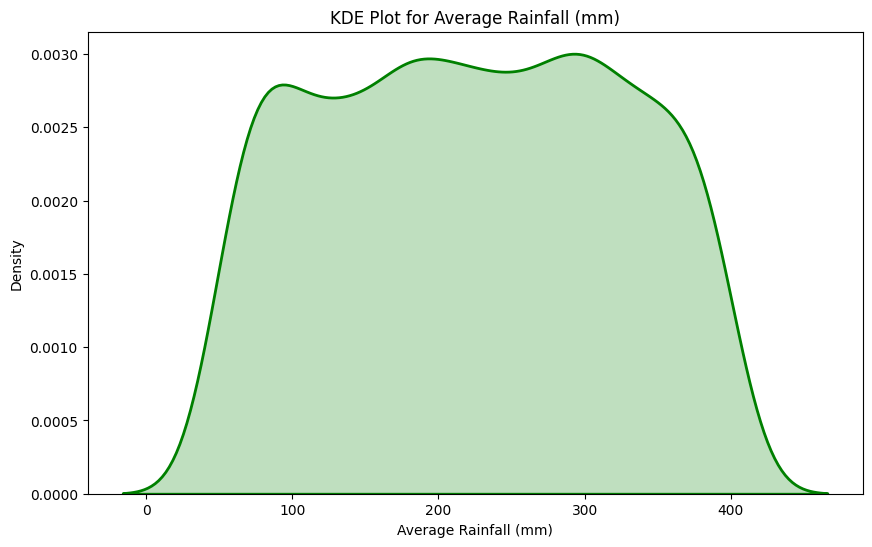

In [27]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Average_Rainfall(mm)'], shade=True, color='green', linewidth=2)
plt.title('KDE Plot for Average Rainfall (mm)')
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Density')
plt.show()

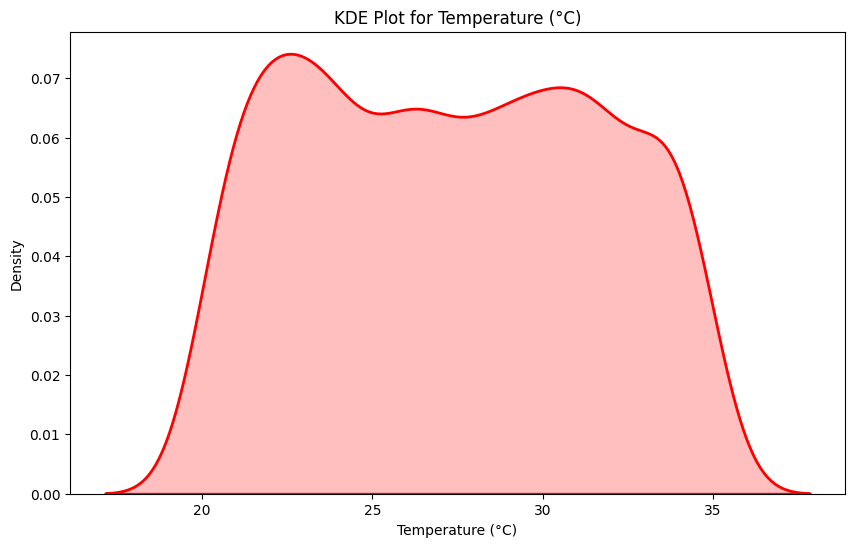

In [28]:
# KDE plot for 'Temperature(°C)'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Temperature(°C)'], shade=True, color='red', linewidth=2)
plt.title('KDE Plot for Temperature (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.show()

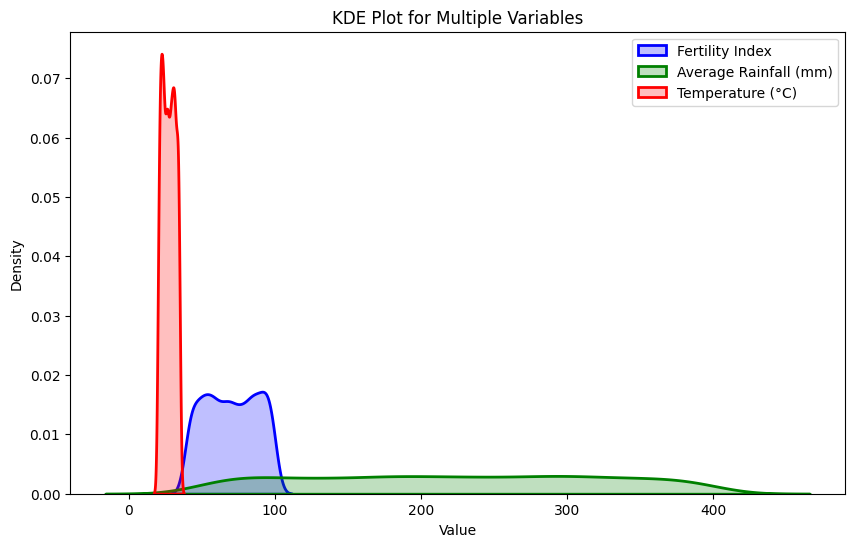

In [29]:
# KDE plot for multiple variables (optional, for comparison)
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Fertility_Index'], shade=True, color='blue', label='Fertility Index', linewidth=2)
sns.kdeplot(df['Average_Rainfall(mm)'], shade=True, color='green', label='Average Rainfall (mm)', linewidth=2)
sns.kdeplot(df['Temperature(°C)'], shade=True, color='red', label='Temperature (°C)', linewidth=2)
plt.title('KDE Plot for Multiple Variables')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

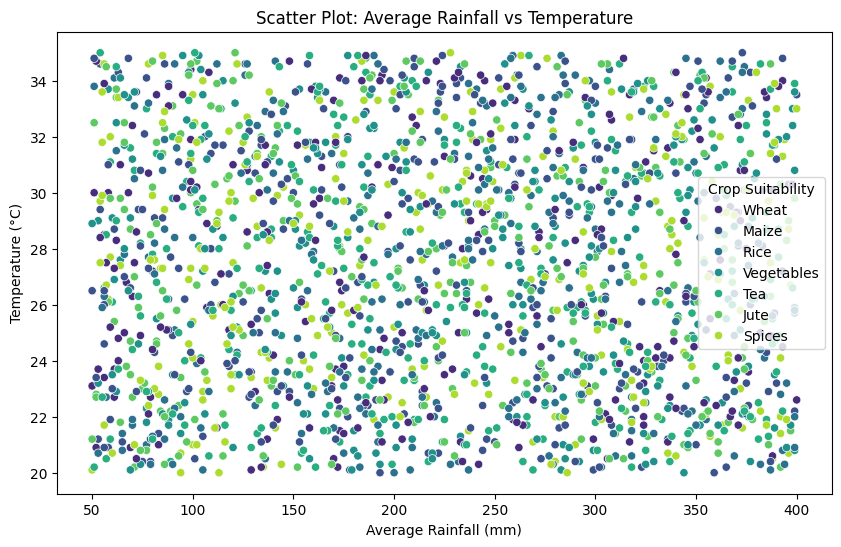

In [30]:
# Scatter plot for 'Average_Rainfall(mm)' vs 'Temperature(°C)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average_Rainfall(mm)', y='Temperature(°C)', data=df, hue='Crop_Suitability', palette='viridis')
plt.title('Scatter Plot: Average Rainfall vs Temperature')
plt.xlabel('Average Rainfall (mm)')
plt.ylabel('Temperature (°C)')
plt.legend(title='Crop Suitability')
plt.show()

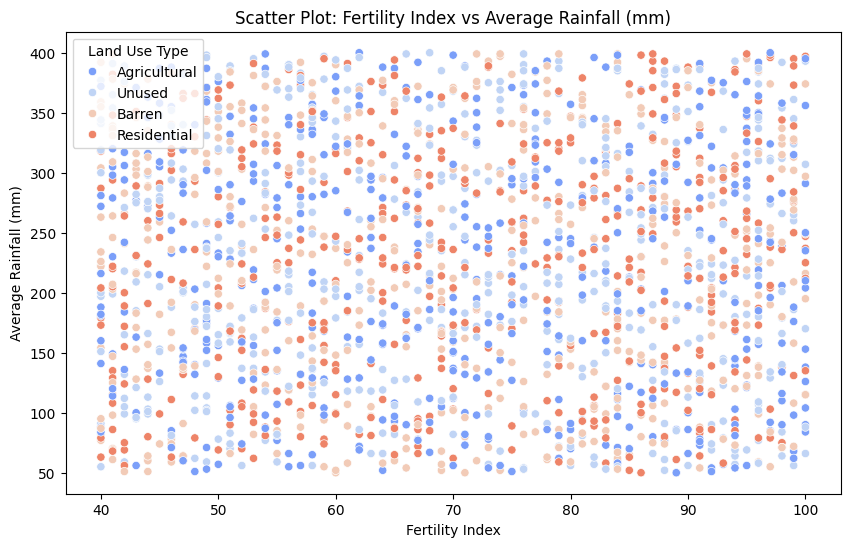

In [31]:
# Scatter plot for 'Fertility_Index' vs 'Average_Rainfall(mm)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fertility_Index', y='Average_Rainfall(mm)', data=df, hue='Land_Use_Type', palette='coolwarm')
plt.title('Scatter Plot: Fertility Index vs Average Rainfall (mm)')
plt.xlabel('Fertility Index')
plt.ylabel('Average Rainfall (mm)')
plt.legend(title='Land Use Type')
plt.show()

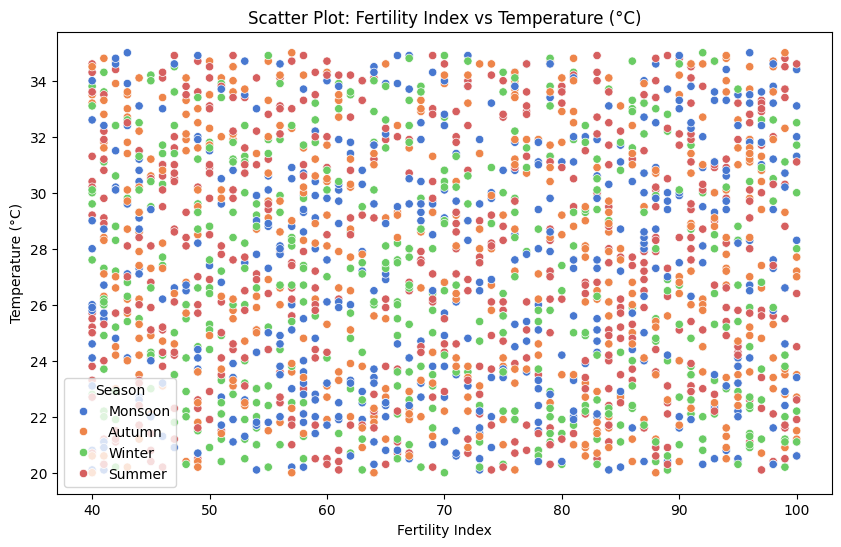

In [32]:
# Scatter plot for 'Fertility_Index' vs 'Temperature(°C)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fertility_Index', y='Temperature(°C)', data=df, hue='Season', palette='muted')
plt.title('Scatter Plot: Fertility Index vs Temperature (°C)')
plt.xlabel('Fertility Index')
plt.ylabel('Temperature (°C)')
plt.legend(title='Season')
plt.show()

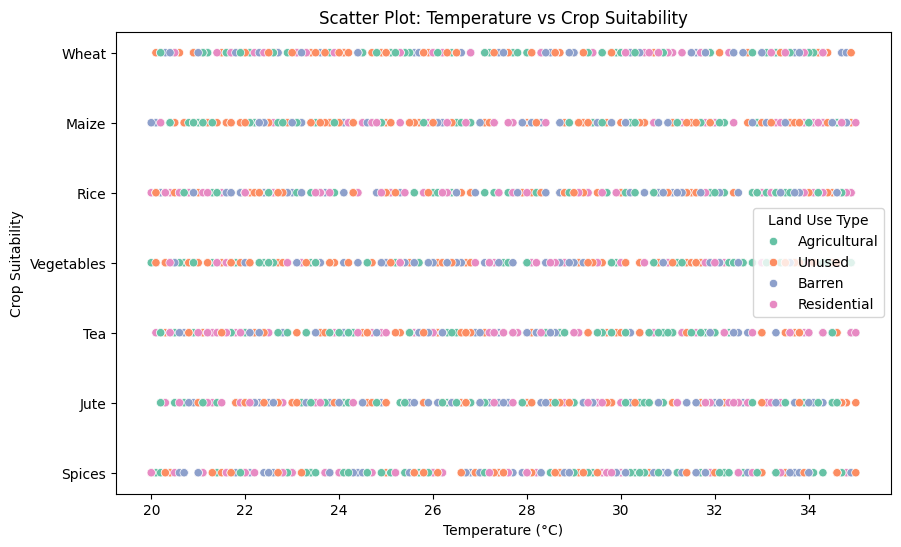

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperature(°C)', y='Crop_Suitability', data=df, hue='Land_Use_Type', palette='Set2')
plt.title('Scatter Plot: Temperature vs Crop Suitability')
plt.xlabel('Temperature (°C)')
plt.ylabel('Crop Suitability')
plt.legend(title='Land Use Type')
plt.show()

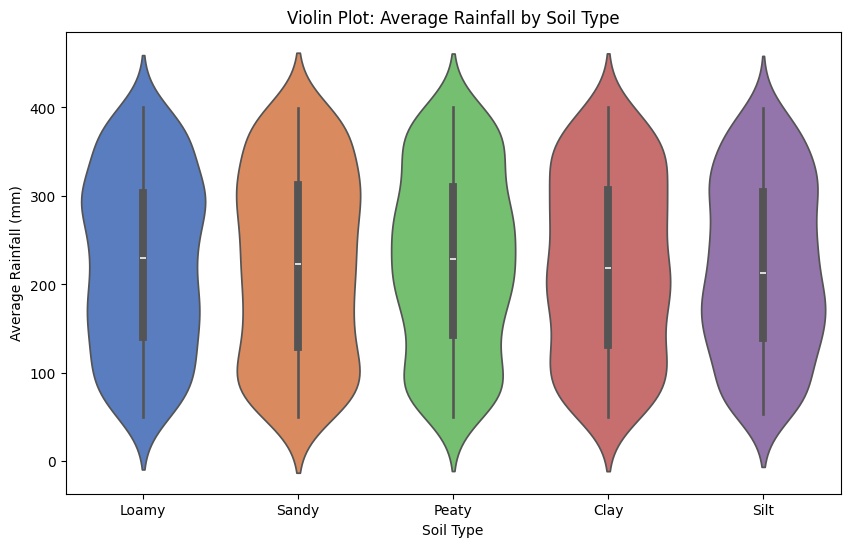

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Soil_Type', y='Average_Rainfall(mm)', data=df, palette='muted')
plt.title('Violin Plot: Average Rainfall by Soil Type')
plt.xlabel('Soil Type')
plt.ylabel('Average Rainfall (mm)')
plt.show()

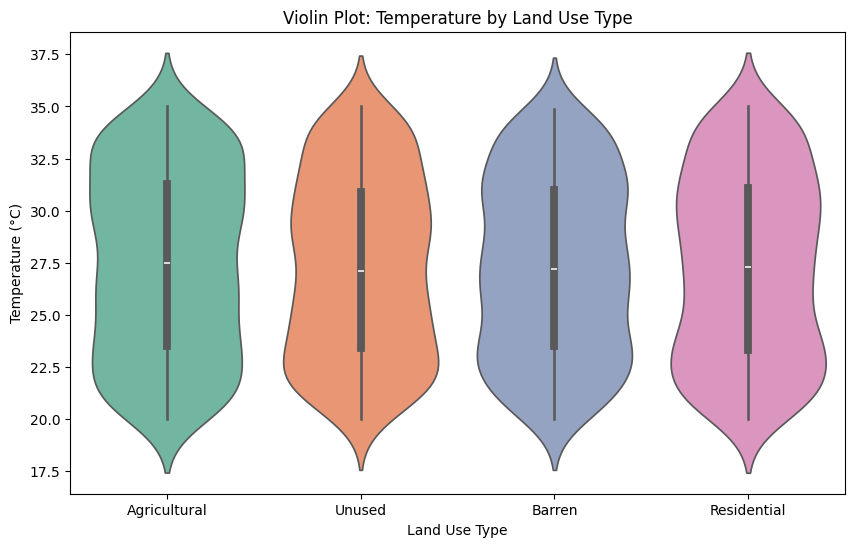

In [35]:
# Violin plot for 'Temperature(°C)' by 'Land_Use_Type'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Land_Use_Type', y='Temperature(°C)', data=df, palette='Set2')
plt.title('Violin Plot: Temperature by Land Use Type')
plt.xlabel('Land Use Type')
plt.ylabel('Temperature (°C)')
plt.show()

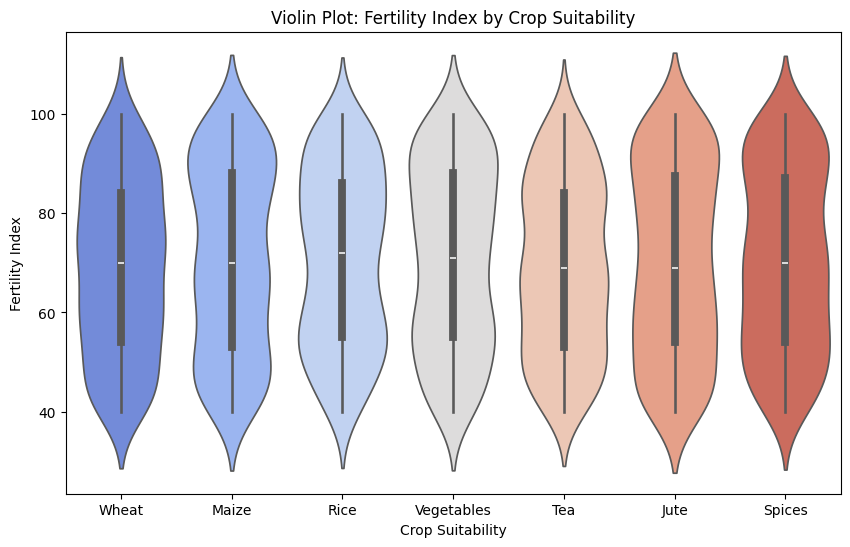

In [36]:
# Violin plot for 'Fertility_Index' by 'Crop_Suitability'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Crop_Suitability', y='Fertility_Index', data=df, palette='coolwarm')
plt.title('Violin Plot: Fertility Index by Crop Suitability')
plt.xlabel('Crop Suitability')
plt.ylabel('Fertility Index')
plt.show()

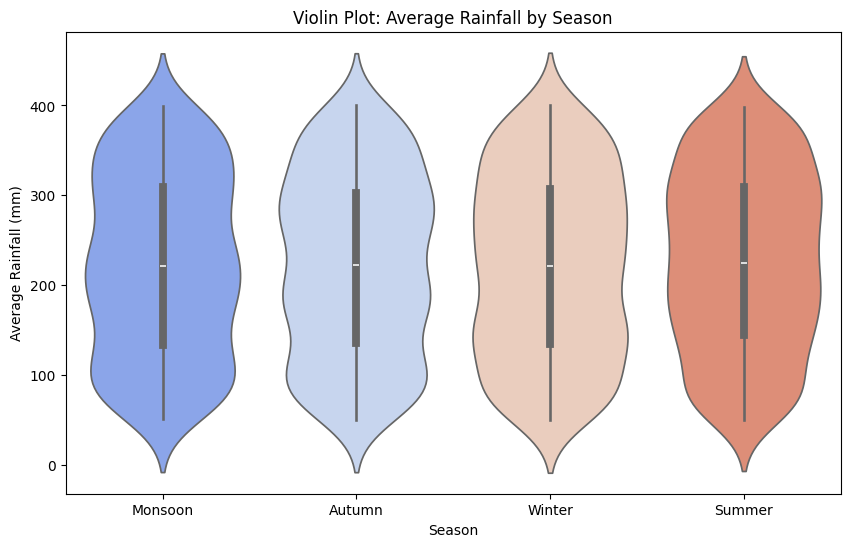

In [37]:
# Violin plot for 'Average_Rainfall(mm)' by 'Season'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Season', y='Average_Rainfall(mm)', data=df, palette='coolwarm')
plt.title('Violin Plot: Average Rainfall by Season')
plt.xlabel('Season')
plt.ylabel('Average Rainfall (mm)')
plt.show()

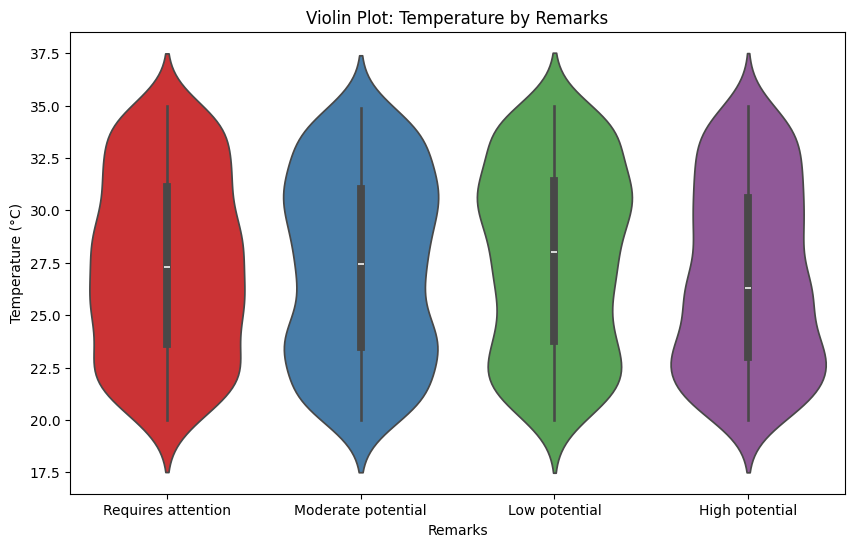

In [38]:
# Violin plot for 'Temperature(°C)' by 'Remarks'
plt.figure(figsize=(10, 6))
sns.violinplot(x='Remarks', y='Temperature(°C)', data=df, palette='Set1')
plt.title('Violin Plot: Temperature by Remarks')
plt.xlabel('Remarks')
plt.ylabel('Temperature (°C)')
plt.show()

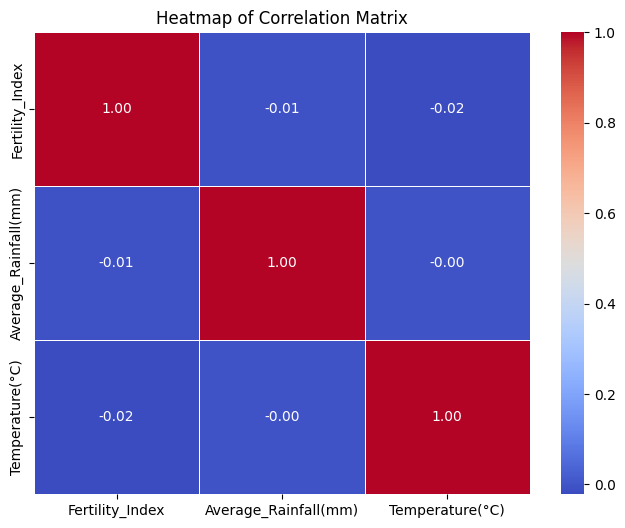

In [39]:
correlation_matrix = df[['Fertility_Index', 'Average_Rainfall(mm)', 'Temperature(°C)']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [40]:
df.columns

Index(['Location', 'Soil_Type', 'Fertility_Index', 'Land_Use_Type',
       'Average_Rainfall(mm)', 'Temperature(°C)', 'Crop_Suitability', 'Season',
       'Satellite_Observation_Date', 'Remarks', 'Year'],
      dtype='object')

In [41]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your dataset is loaded
# dataset = pd.read_csv('your_file.csv')

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Loop through all categorical columns and apply label encoding
categorical_columns = df.select_dtypes(include=['object']).columns  # Find categorical columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the encoded dataset
print(df.head())

   Location  Soil_Type  Fertility_Index  Land_Use_Type  Average_Rainfall(mm)  \
0         7          1               62              0                    72   
1         2          3               63              3                   118   
2         6          2               51              0                   106   
3         3          3               67              1                   336   
4         6          2               63              0                   237   

   Temperature(°C)  Crop_Suitability  Season Satellite_Observation_Date  \
0             28.6                 6       1                 2024-09-24   
1             23.8                 1       0                 2024-01-31   
2             32.0                 1       0                 2024-03-11   
3             31.6                 6       0                 2024-09-29   
4             20.1                 2       3                 2024-04-01   

   Remarks  Year  
0        3  2024  
1        2  2024  
2        3 

In [42]:
# Convert 'Satellite_Observation_Date' to datetime
df['Satellite_Observation_Date'] = pd.to_datetime(df['Satellite_Observation_Date'])

# Extract specific components (year, month, day)
df['Year'] = df['Satellite_Observation_Date'].dt.year
df['Month'] = df['Satellite_Observation_Date'].dt.month
df['Day'] = df['Satellite_Observation_Date'].dt.day

# Display the updated dataset
print(df[['Satellite_Observation_Date', 'Year', 'Month', 'Day']].head())

  Satellite_Observation_Date  Year  Month  Day
0                 2024-09-24  2024      9   24
1                 2024-01-31  2024      1   31
2                 2024-03-11  2024      3   11
3                 2024-09-29  2024      9   29
4                 2024-04-01  2024      4    1


In [43]:
# Delete the columns 'Satellite_Observation_Date' and 'Day'
df = df.drop(columns=['Satellite_Observation_Date', 'Day'])

# Display the updated dataset
print(df.head())

   Location  Soil_Type  Fertility_Index  Land_Use_Type  Average_Rainfall(mm)  \
0         7          1               62              0                    72   
1         2          3               63              3                   118   
2         6          2               51              0                   106   
3         3          3               67              1                   336   
4         6          2               63              0                   237   

   Temperature(°C)  Crop_Suitability  Season  Remarks  Year  Month  
0             28.6                 6       1        3  2024      9  
1             23.8                 1       0        2  2024      1  
2             32.0                 1       0        3  2024      3  
3             31.6                 6       0        1  2024      9  
4             20.1                 2       3        2  2024      4  


In [44]:
from sklearn.preprocessing import MinMaxScaler

# Assuming your dataset is loaded
# dataset = pd.read_csv('your_file.csv')

# Select only the numerical columns for scaling
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Apply Min-Max Scaling to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the scaled dataset
print(df.head())

   Location  Soil_Type  Fertility_Index  Land_Use_Type  Average_Rainfall(mm)  \
0  1.000000       0.25         0.366667       0.000000              0.062857   
1  0.285714       0.75         0.383333       1.000000              0.194286   
2  0.857143       0.50         0.183333       0.000000              0.160000   
3  0.428571       0.75         0.450000       0.333333              0.817143   
4  0.857143       0.50         0.383333       0.000000              0.534286   

   Temperature(°C)  Crop_Suitability    Season   Remarks  Year  Month  
0         0.573333          1.000000  0.333333  1.000000  2024      9  
1         0.253333          0.166667  0.000000  0.666667  2024      1  
2         0.800000          0.166667  0.000000  1.000000  2024      3  
3         0.773333          1.000000  0.000000  0.333333  2024      9  
4         0.006667          0.333333  1.000000  0.666667  2024      4  


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB  # Importing GaussianNB
import xgboost as xgb
import lightgbm as lgb

In [46]:
df.head(2)

,Location,Soil_Type,Fertility_Index,Land_Use_Type,Average_Rainfall(mm),Temperature(°C),Crop_Suitability,Season,Remarks,Year,Month
0,1.000000,0.25,0.366667,0.0,0.062857,0.573333,1.000000,0.333333,1.000000,2024,9
1,0.285714,0.75,0.383333,1.0,0.194286,0.253333,0.166667,0.000000,0.666667,2024,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Location              2000 non-null   float64
 1   Soil_Type             2000 non-null   float64
 2   Fertility_Index       2000 non-null   float64
 3   Land_Use_Type         2000 non-null   float64
 4   Average_Rainfall(mm)  2000 non-null   float64
 5   Temperature(°C)       2000 non-null   float64
 6   Crop_Suitability      2000 non-null   float64
 7   Season                2000 non-null   float64
 8   Remarks               2000 non-null   float64
 9   Year                  2000 non-null   int32  
 10  Month                 2000 non-null   int32  
dtypes: float64(9), int32(2)
memory usage: 156.4 KB


In [48]:
label_encoder = LabelEncoder()
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [49]:
y = df['Crop_Suitability']
y = label_encoder.fit_transform(y)

In [50]:
# Split dataset into features (X) and target (y)
X = df.drop(columns=['Crop_Suitability'])  # Features
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
# List of classifiers to evaluate
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "LightGBM": lgb.LGBMClassifier()
}

In [52]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy  # Store the results

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 494
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 9
[LightGBM] [Info] Start training from score -2.002481
[LightGBM] [Info] Start training from score -1.876501
[LightGBM] [Info] Start training from score -1.935341
[LightGBM] [Info] Start training from score -1.876501
[LightGBM] [Info] Start training from score -1.897120
[LightGBM] [Info] Start training from score -1.988687
[LightGBM] [Info] Start training from score -2.059639


In [53]:
for name, accuracy in results.items():
    print(f"{name}: {accuracy:.4f}")

Logistic Regression: 0.1150
K-Nearest Neighbors: 0.1400
Support Vector Machine: 0.1150
Decision Tree: 0.1125
Random Forest: 0.1150
Naive Bayes: 0.1100
Gradient Boosting: 0.1475
AdaBoost: 0.1125
XGBoost: 0.1500
LightGBM: 0.1575


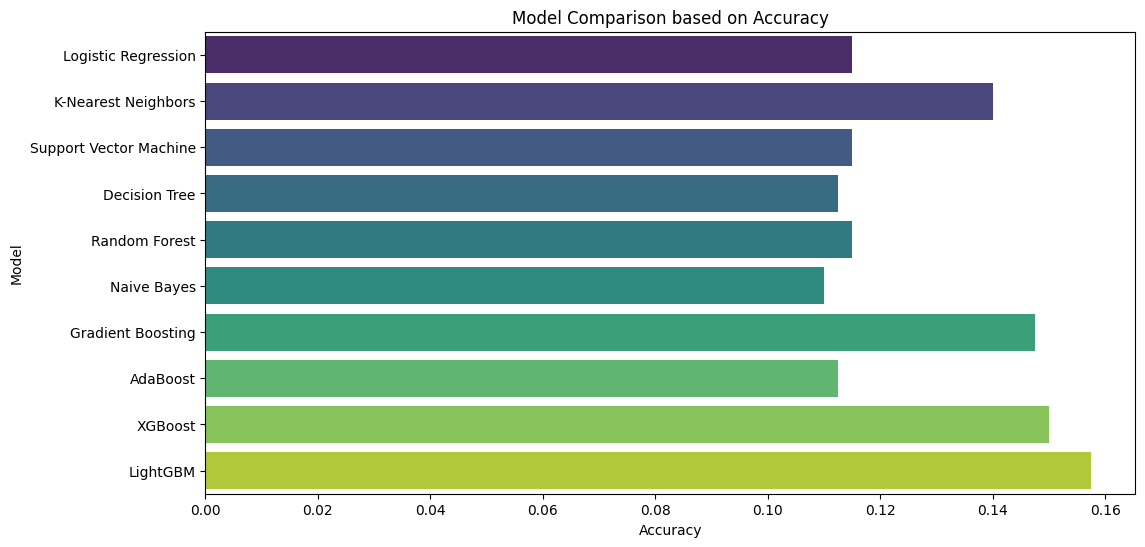

In [54]:
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(data=results_df, x="Accuracy", y="Model", palette="viridis")
plt.title("Model Comparison based on Accuracy")
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.show()